<a href="https://colab.research.google.com/github/duducosmos/problemadamochila/blob/main/ProblemaDaMochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo genético para resolver o problema da mochila


Instalação das bibliotecas necessárias.


O problema da mochila  é um problema de optimização combinatório. Nesse caso, a mochila aguenta uma certa carga máxima e o objetivo é preenchela com uma certa quantidade de objetos. Cada objeto tem um peso e um valor. O objetivo central é preencher a mochila com o maior valor possível sem ultrapassar a carga máxima.

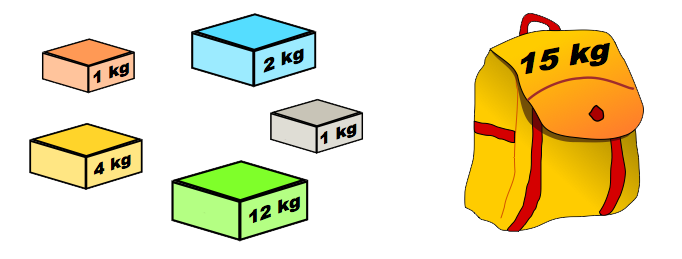




Vamos modelar o problema utilizando algoritmo genético.

usando as seguintes condições:

1.   Os produtos com seus respectivos pesos serão organizados em uma lista ordenada. 
2.  Iremos utilizar um código genético binário para mapear se devemos colocar um determinado objeto de uma posição da lista na mochila.
3. O tamanho total de genes será um múltiplo do tamanho da lista de objetos.


O preenchimento da mochila se baseará na seguinte meta-heurística. 

1. Os cromossomos serão formados por um conjunto total de genes do tamanho de da lista de objetos 
2. Uma "enzima" fará a leitura do cromossomo. Se o gene do cromossomo tiver valor 1 em uma determinada posição, o objeto que está na mesma posição que o gene será armazenado na mochila.
3. A enzima sempre verifica a soma do peso do objeto a ser colocado com o peso total corrente da mochila. Se esse valor ultrapassar a carga da mochila o objeto não é colocado na mochila e a enzima encerra o trabalho.


Além das condições anteriores, vamos adicionar também a condição de máximo de elementos repetidos que podem ser colocados na mochila.

Abaixo é apresentado uma figura que ilustra o problema

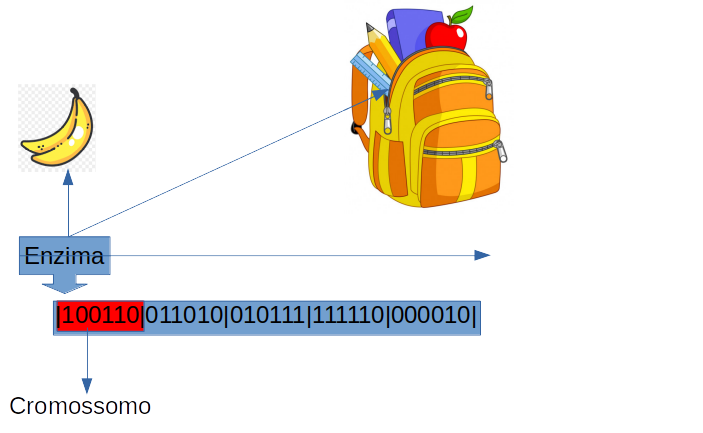

Vamos utilizar a biblioteca pygenec descrita no livro [Computação Evolucionária
Aplique os algoritmos genéticos com Python e Numpy](https://www.casadocodigo.com.br/products/livro-computacao-evolucionaria?fbclid=IwAR0KDQmwhDInh6elrbvs3xwI6dQ5AsCu_QRyWI0n9z0zlDfVqcU1r8ds6Hw) publicado pela Casa do Código.

In [ ]:
!pip install pathos progressbar2 pygenec==1.1.1

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 


In [ ]:
from collections import OrderedDict
from numpy import array, hsplit, concatenate, exp
import matplotlib.pyplot as plt


import pandas as pd
from pygenec.populacao import Populacao
from pygenec.selecao.roleta import Roleta
from pygenec.cruzamento.kpontos import KPontos
from pygenec.mutacao.flip import Flip
from pygenec.evolucao import Evolucao
from pygenec import AlgoritmoGenetico
from pygenec import binarray2int



In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower



Na versão 1.1.1 da biblioteca pygenec existe uma classe abstrata que reune os principais elementos apra a criação do algoritmo genético. Assim, para resolver um problema específico basta definir a função objetivo, a qual deve retornar o valor numérico da função a ser optimizada. Por padrão, o algoritmo genético realiza a maximização de uma função. Caso queira obter o mínimo da função basta multiplicar o resultado da função por -1.



O código abaixo estende a classe AlgoritmoGenetico. Vamos adicinar uma penalidade, para garantiar a maior variabilidade de objetos na mochila. A ideia é que o algoritmo tente encaixar ao menos um objeto de cada tipo na mochila. O código é construído de tal forma que jamais será ultrapassado a carga máxima da mochila. 

In [ ]:
class Mochila(AlgoritmoGenetico):
    def __init__(self, capacidade, pesos, maxob, cromossomos, selecao, cruzamento, mutacao, **kwargs):
        super(Mochila, self).__init__(
            selecao, cruzamento, mutacao, 1, cromossomos, **kwargs)
        self._pesos = pesos
        self._capacidade = capacidade
        self.maxob = maxob

    def lista_objetos(self, individuo):
        total = 0
        valor_total = 0
        objetos = OrderedDict()
        n_objs = 0
        npesos = len(self._pesos)

        for i in range(0, self._cromossomos, npesos):
            for k in range(len(self._pesos)):
                if individuo[i:i+npesos][k] == 1:
                    if total < self._capacidade:
                        if total + self._pesos[k][0] <= self._capacidade:
                            if k not in objetos:
                                objetos[k] = [self._pesos[k]]
                                total += self._pesos[k][0]
                                valor_total += self._pesos[k][1]
                                n_objs += 1
                            else:
                                if len(objetos[k]) < self.maxob:
                                    objetos[k].append(self._pesos[k])
                                    total += self._pesos[k][0]
                                    valor_total += self._pesos[k][1]
                                    n_objs += 1
                        else:
                          break
                    else:
                      break

        penalidade =  exp(( len(objetos.keys()) / npesos ))    
        optimizar = valor_total * penalidade

        return optimizar, n_objs, total, valor_total, objetos

    def funcao_objetivo(self, individuo):

        return self.lista_objetos(individuo)[0]


In [ ]:
bits = 1
capacidade = 30
pesos = [[2.5, 1], [0.25, 0.5], [1.32, 2.3], [0.4, 0.3], [1.25, 0.5], [0.33, 2], [1.36, 0.75], [0.1, 0.5]]
cromossomos = 50 * len(pesos)
maxob = 10

In [ ]:

algen = Mochila(capacidade, pesos, maxob, cromossomos, Roleta, KPontos, Flip, total_geracoes=100)
 
m = [_ for _ in algen()]

 49% (49 of 100) |###########            | Elapsed Time: 0:00:11 ETA:   0:00:12

Epidemia


 99% (99 of 100) |###################### | Elapsed Time: 0:00:23 ETA:   0:00:00

Epidemia


100% (100 of 100) |######################| Elapsed Time: 0:00:24 Time:  0:00:24


In [ ]:
print(algen.lista_objetos(m[-1]))

(131.1570982231489, 47, 29.979999999999997, 48.249999999999986, OrderedDict([(1, [[0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5]]), (2, [[1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3]]), (3, [[0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3]]), (4, [[1.25, 0.5], [1.25, 0.5]]), (5, [[0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2]]), (6, [[1.36, 0.75], [1.36, 0.75], [1.36, 0.75], [1.36, 0.75], [1.36, 0.75]]), (7, [[0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5]]), (0, [[2.5, 1]])]))


In [ ]:
df = pd.DataFrame([algen.lista_objetos(mi)[1:4] for mi in m], columns=['objetos', 'peso', 'valor'])



In [ ]:
df2 = pd.DataFrame([[k, len(v)] for k, v in algen.lista_objetos(m[-1])[4].items()], columns=['objeto', 'contagem'])

Nas figuras abaixo podemos notar que a tendência do algoritmo foi o de reduzir o peso máximo, aumentar a quantidade de produtos na mochila e sempre maximizar o valor final do conteúdo da mochila

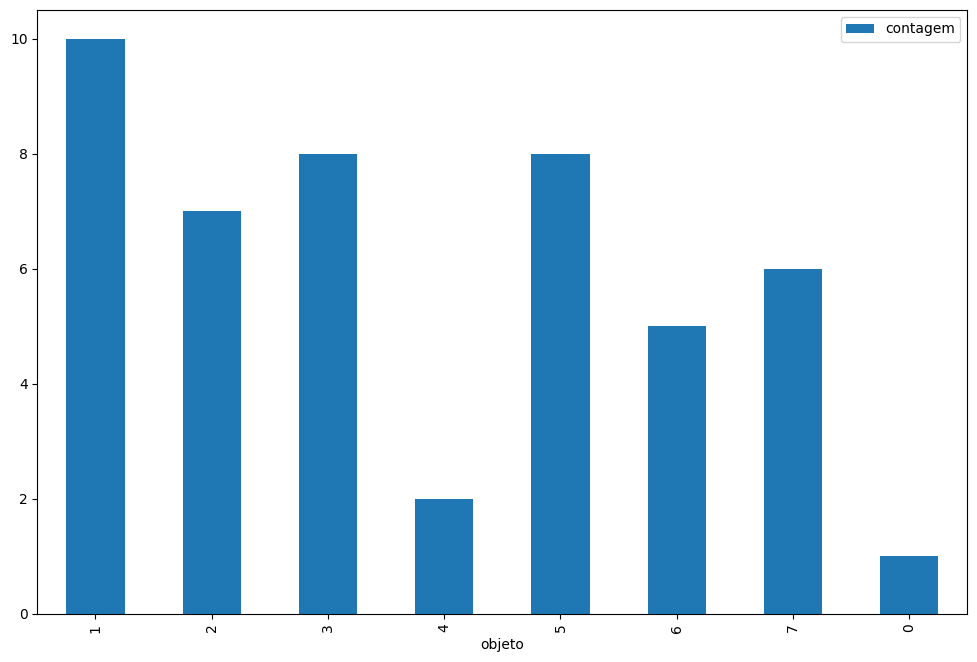

In [ ]:
df2.plot.bar(x='objeto',y='contagem')


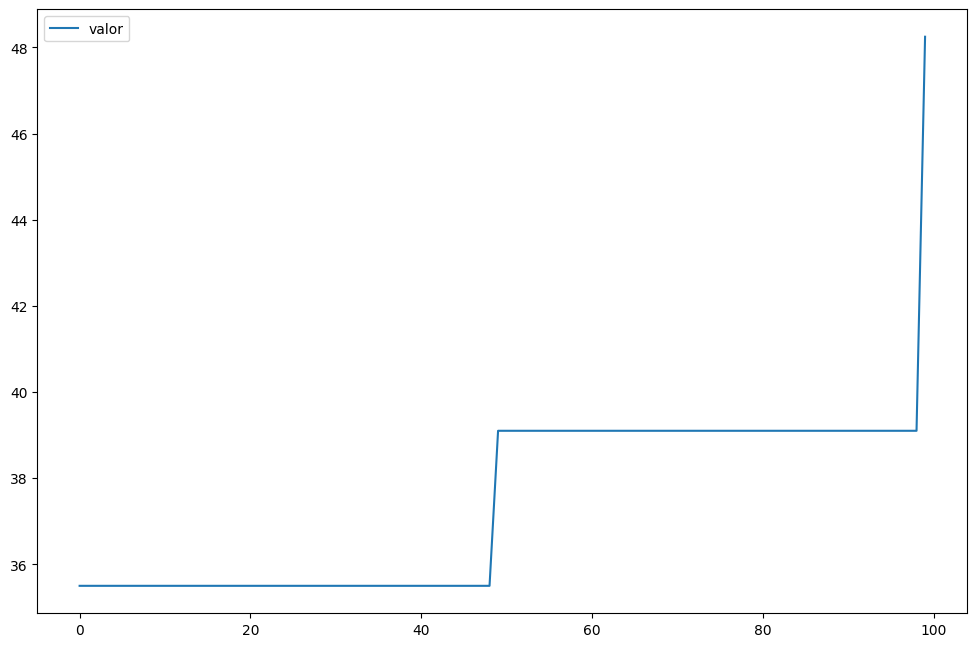

In [ ]:
df.plot(y='valor')

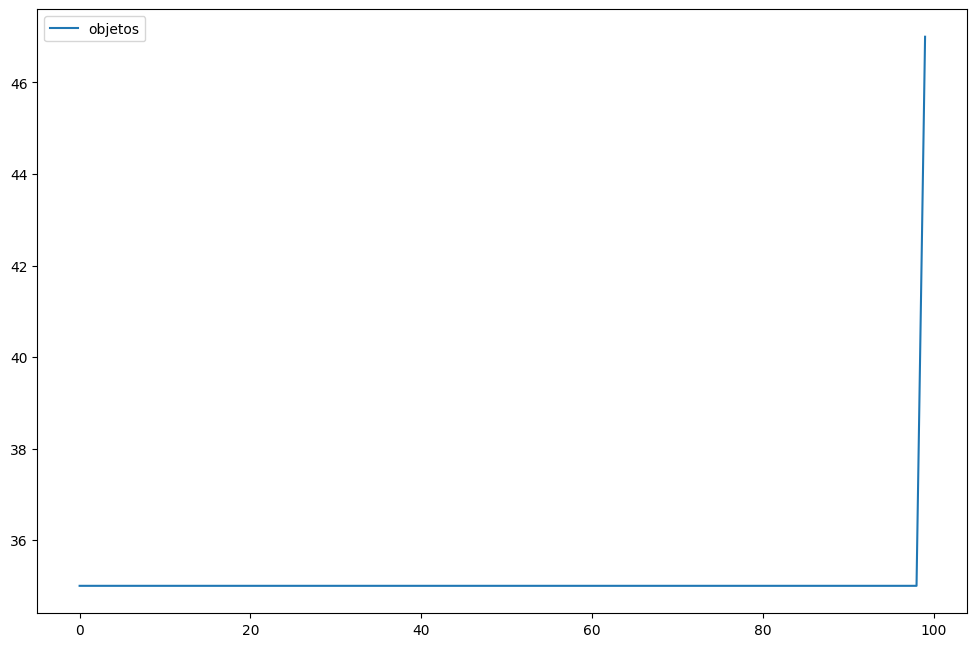

In [ ]:
df.plot(y='objetos')


In [ ]:

algen2 = Mochila(capacidade, pesos, maxob, cromossomos, Roleta, KPontos, Flip,total_geracoes=500)
 
m2 = [_ for _ in algen2()]

  9% (49 of 500) |##                     | Elapsed Time: 0:00:11 ETA:   0:01:48

Epidemia


 19% (99 of 500) |####                   | Elapsed Time: 0:00:24 ETA:   0:01:35

Epidemia


 29% (149 of 500) |######                | Elapsed Time: 0:00:35 ETA:   0:01:26

Epidemia


 49% (249 of 500) |##########            | Elapsed Time: 0:01:00 ETA:   0:01:00

Epidemia


 59% (299 of 500) |#############         | Elapsed Time: 0:01:12 ETA:   0:00:47

Epidemia


 69% (349 of 500) |###############       | Elapsed Time: 0:01:29 ETA:   0:00:36

Epidemia


 79% (399 of 500) |#################     | Elapsed Time: 0:01:42 ETA:   0:00:25

Epidemia


 89% (449 of 500) |###################   | Elapsed Time: 0:01:54 ETA:   0:00:12

Epidemia


 99% (499 of 500) |##################### | Elapsed Time: 0:02:06 ETA:   0:00:00

Epidemia


100% (500 of 500) |######################| Elapsed Time: 0:02:06 Time:  0:02:06


In [ ]:
print(algen2.lista_objetos(m2[-1]))

(147.3308751024802, 45, 29.919999999999998, 54.19999999999999, OrderedDict([(4, [[1.25, 0.5], [1.25, 0.5]]), (5, [[0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2], [0.33, 2]]), (6, [[1.36, 0.75], [1.36, 0.75], [1.36, 0.75], [1.36, 0.75]]), (7, [[0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5], [0.1, 0.5]]), (1, [[0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5], [0.25, 0.5]]), (3, [[0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3], [0.4, 0.3]]), (2, [[1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3], [1.32, 2.3]]), (0, [[2.5, 1]])]))


In [ ]:
df = pd.DataFrame([algen2.lista_objetos(mi)[1:4] for mi in m2], columns=['objetos', 'peso', 'valor'])


In [ ]:
df2 = pd.DataFrame([[k, len(v)] for k, v in algen2.lista_objetos(m2[-1])[4].items()], columns=['objeto', 'contagem'])

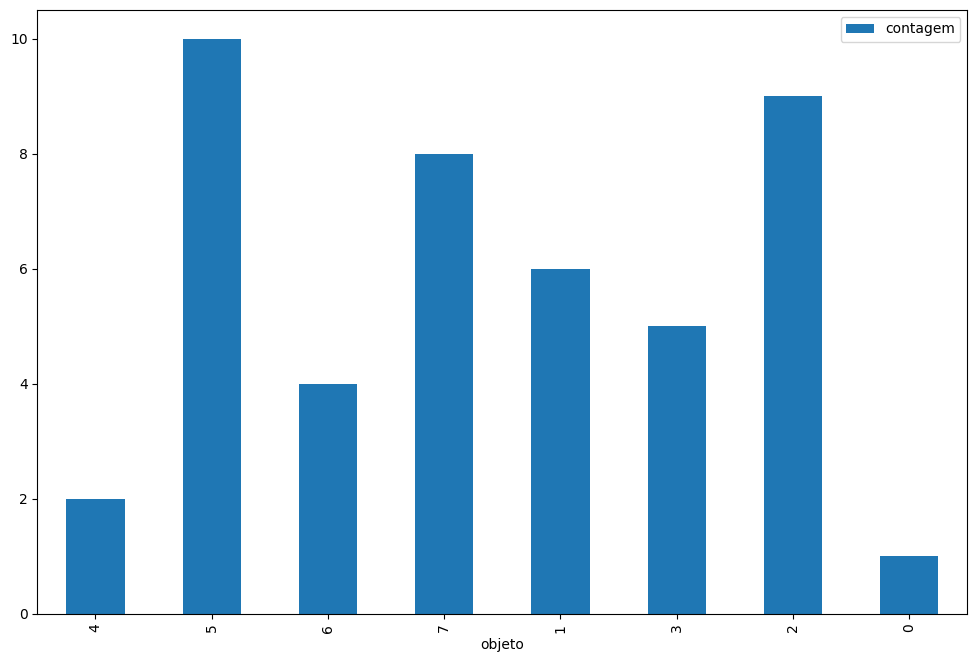

In [ ]:
df2.plot.bar(x='objeto',y='contagem')


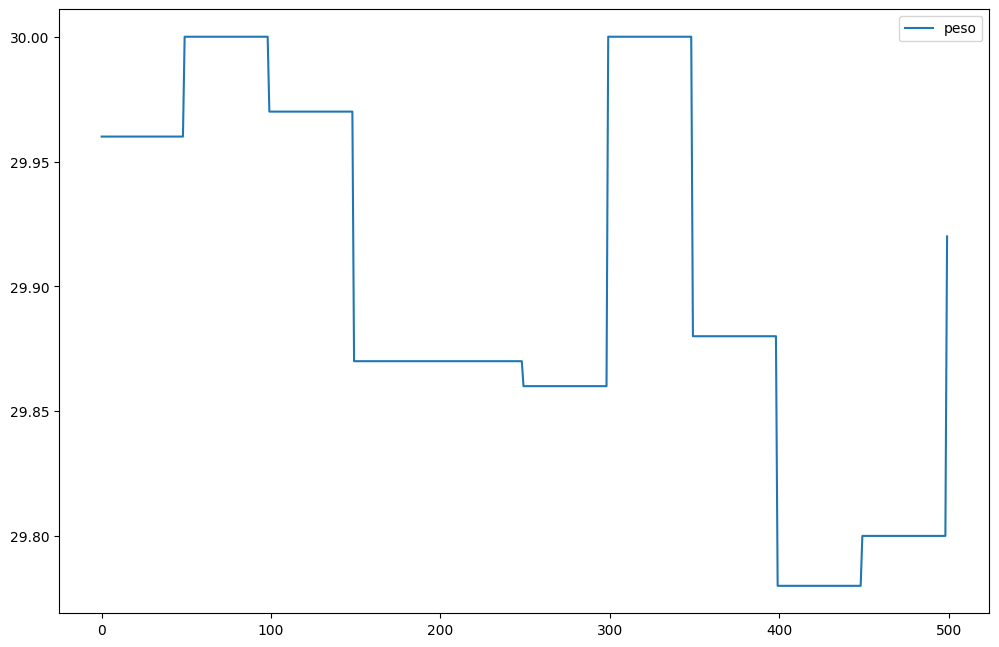

In [ ]:
df.plot(y='peso')


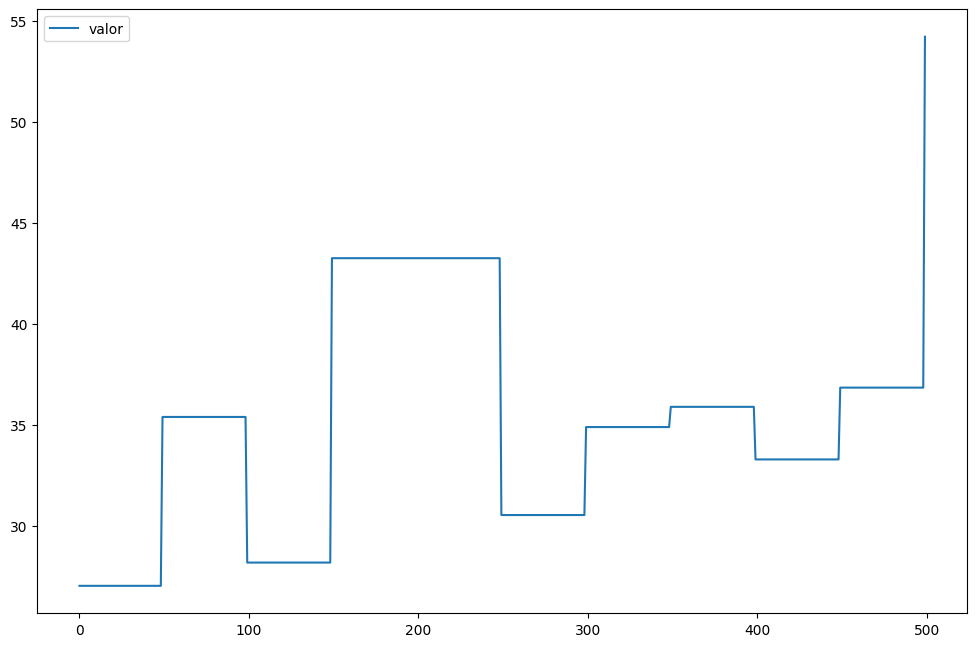

In [ ]:
df.plot(y='valor')

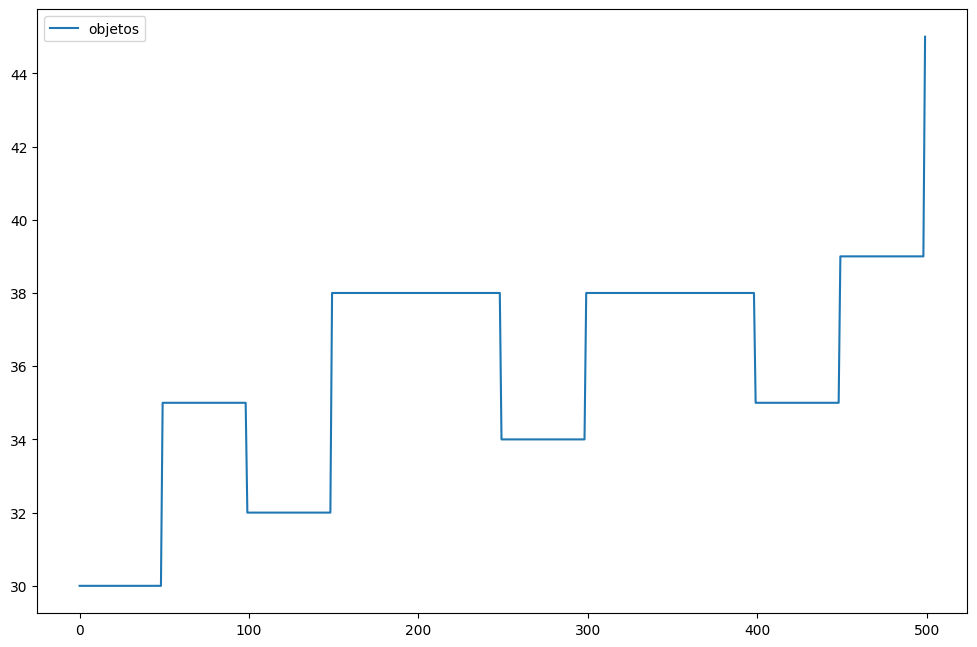

In [ ]:
df.plot(y='objetos')
